ERROR: Could not find a version that satisfies the requirement fcmeans (from versions: none)

[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
ERROR: No matching distribution found for fcmeans
Note: you may need to restart the kernel to use updated packages.


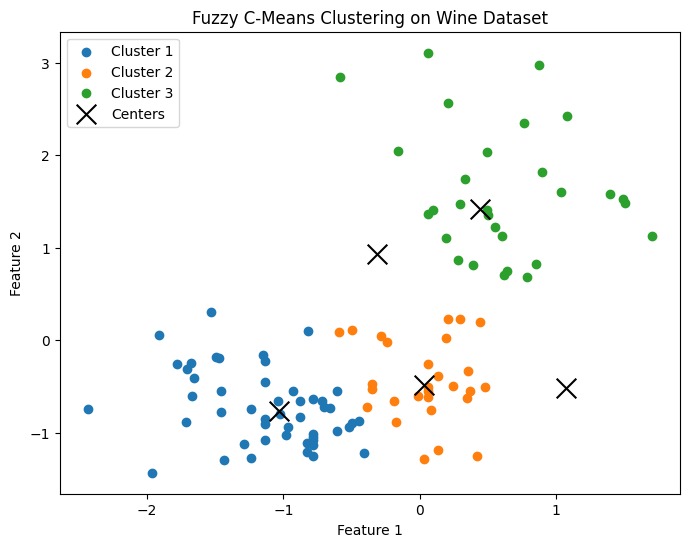

In [6]:
%pip install fcmeans

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from fcmeans import FCM
from sklearn.datasets import load_wine


wine = load_wine()
X = wine.data[:, :2]  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Fuzzy C-Means
fcm = FCM(n_clusters=5, m=3.0, max_iter=1000, error=1e-5, random_state=42)
fcm.fit(X_scaled)

centers = fcm.centers
labels = fcm.predict(X_scaled)

plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X_scaled[labels == i, 0], X_scaled[labels == i, 1], label=f'Cluster {i+1}')

plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='black', s=200, label='Centers')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Fuzzy C-Means Clustering on Wine Dataset")
plt.show()
